# Example Datasets

Here, we implemented neural network model for a classifiaction task and a regression task. The datasets we used are [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) (classification) and [boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) (regression) from sklearn.

We use NeuralNet class from nnet.py which is basically a class of what we have done in the [learning_internal_representation notebook](./learning_internal_representations.ipynb)

In [1]:
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.preprocessing import StandardScaler

from nnet import NeuralNet

In [2]:
# Setting Data Frame Options                      
pd.set_option('display.max_rows', 40)                      
pd.set_option('display.max_columns', 50)                      
pd.set_option('display.width', 100)                      
pd.set_option('display.max_colwidth', 100)                      

# Setting Plot Configuration                      
sns.set(rc={'figure.figsize':(17,11)}, style = 'white')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']
y = y.reshape(len(y), 1)

layers_ = [40, 20, 1]
activations_ = ['erf', 'erf', 'sigmoid']
loss_ = 'mse'
learning_rate_ = 0.01
epochs_ = 2000

model = NeuralNet(layers=layers_, activations=activations_)

model.fit(X, y, epochs=epochs_, learning_rate=learning_rate_, loss=loss_)

y_pred = model.predict(X, return_classes=True)

print("="*60)
print("Confusion Matrix")
print(classification_report(y, y_pred))

Epoch 0 	 Cost: 0.30291473032348654
Epoch 263 	 Cost: 0.10912226608254874
Epoch 526 	 Cost: 0.08787921624738938
Epoch 789 	 Cost: 0.06022117865019581
Epoch 1052 	 Cost: 0.040872750093774106
Epoch 1315 	 Cost: 0.034403886172644546
Epoch 1578 	 Cost: 0.03148674234379667
Epoch 1841 	 Cost: 0.030495527254629947
Confusion Matrix
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       212
           1       0.91      0.97      0.94       357

    accuracy                           0.92       569
   macro avg       0.92      0.90      0.91       569
weighted avg       0.92      0.92      0.92       569



<IPython.core.display.Javascript object>

<AxesSubplot:>

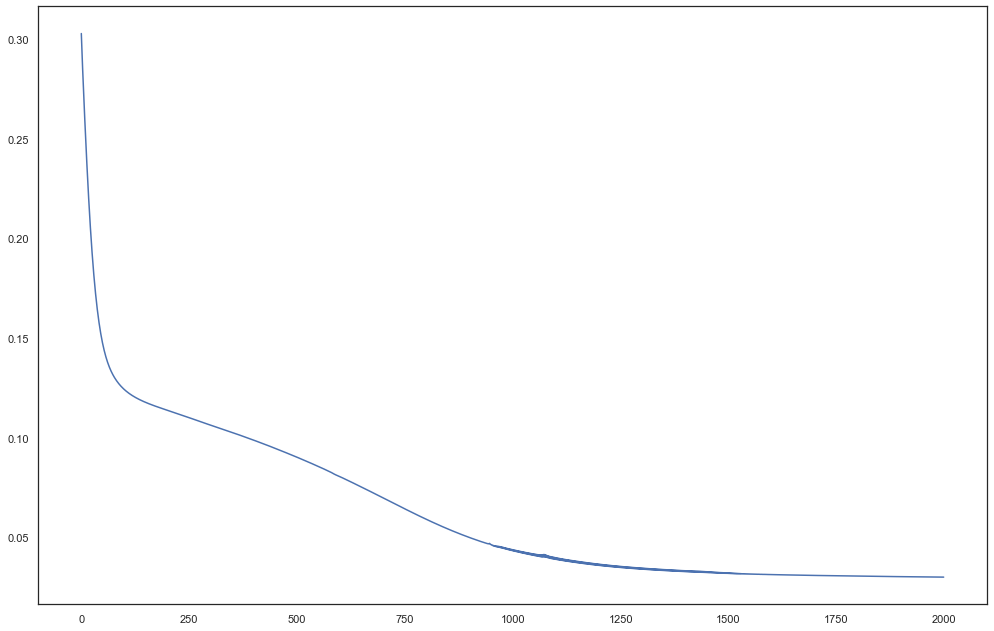

In [5]:
costs = model.history['costs']
sns.lineplot(x=np.arange(len(costs)), y=costs)

<IPython.core.display.Javascript object>

Epoch 0 	 Cost: 4.687373883792804
Epoch 80 	 Cost: 0.08330894051535061
Epoch 160 	 Cost: 0.08302125579808264
Epoch 240 	 Cost: 0.08223183320115669
Epoch 320 	 Cost: 0.07819078646300928
Epoch 400 	 Cost: 0.04589936945917833
Epoch 480 	 Cost: 0.027005123588112485


<IPython.core.display.Javascript object>

MSE:  0.0506 	 RMSE:  0.2249


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

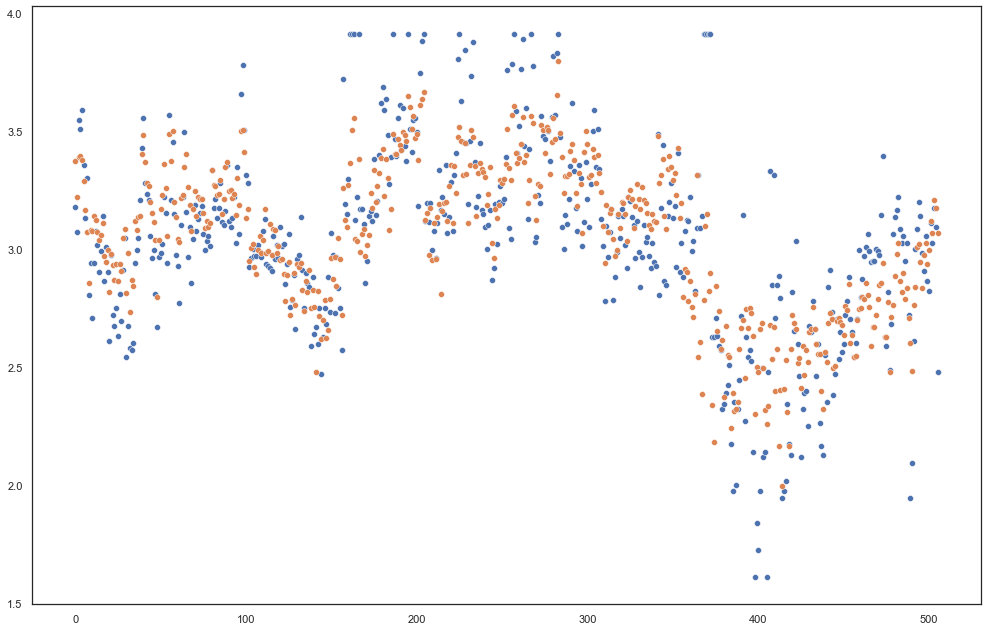

In [10]:
dataset = load_boston()
X, y = dataset['data'], dataset['target']
y = y.reshape(len(y), 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

layers_ = [30, 15, 1]
activations_ = ['arctan', 'relu', 'linear']
loss_ = 'mse'
learning_rate_ = 0.1
epochs_ = 500

model = NeuralNet(layers=layers_, activations=activations_)

model.fit(X, np.log(y), epochs=epochs_, learning_rate=learning_rate_, loss=loss_)

y_pred = model.predict(X, return_classes=False)

mse = mean_squared_error(np.log(y), y_pred)
print("="*60)
print(f'MSE: {mse: .4f} \t RMSE: {mse**.5: .4f}')

sns.scatterplot(x=np.arange(X.shape[0]), y=np.log(y).ravel())
sns.scatterplot(x=np.arange(X.shape[0]), y=y_pred.ravel())

<IPython.core.display.Javascript object>

<AxesSubplot:>

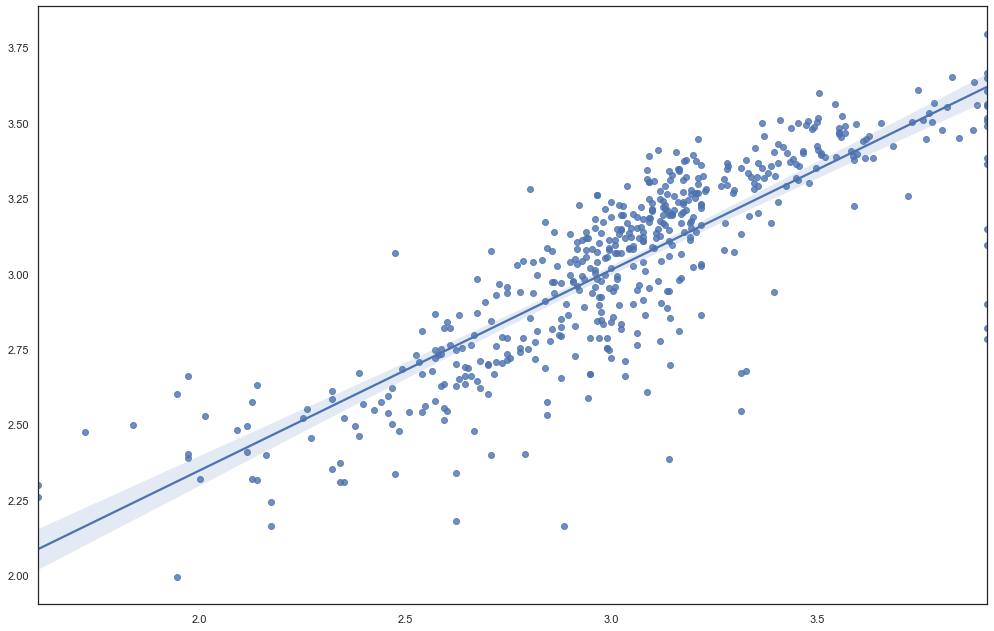

In [11]:
sns.regplot(x=np.log(y).ravel(), y=y_pred.ravel())

<IPython.core.display.Javascript object>

<AxesSubplot:>

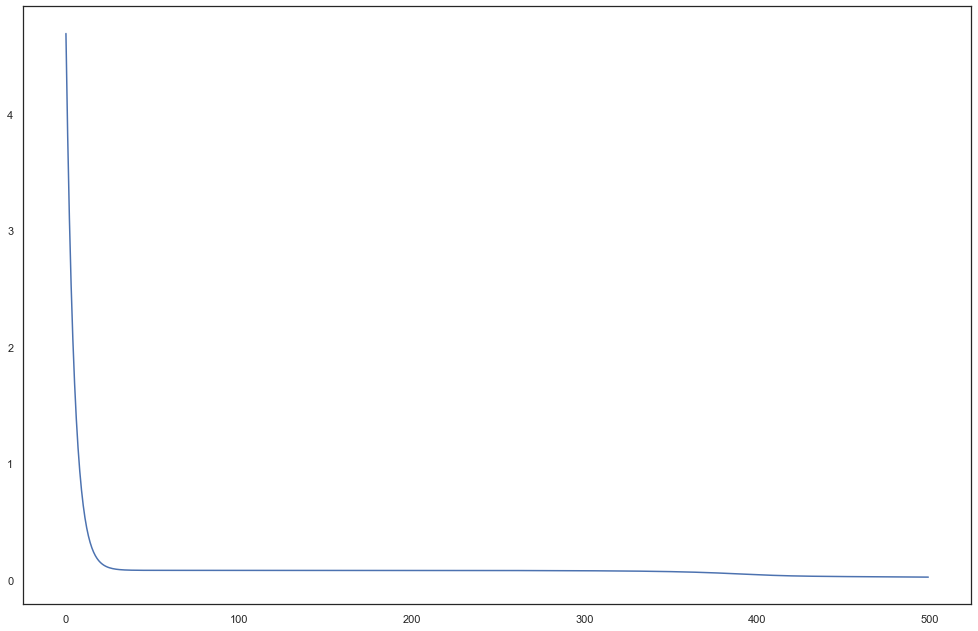

In [12]:
costs = model.history['costs']
sns.lineplot(x=np.arange(len(costs)), y=costs)